In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\pasar\Machine Learning\Week 6\Praktikum\Sesi 2\Data_Pelanggan.csv')

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
print(dataset.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
# Mencetak Train set (x)
print("Train set (X_train):")
print(X_train)

Train set (X_train):
[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [13]:
from math import sqrt

class KNN:
    def __init__(self, k): 
        self.k = k
        print(self.k)
    
    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
    
    def calculate_euclidean(self, sample1, sample2):
        distance = 0.0
        for i in range(len(sample1)):
            distance += (sample1[i] - sample2[i]) ** 2
        return sqrt(distance)
    
    def nearest_neighbors(self, test_sample):
        distances = []  
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i], self.calculate_euclidean(self.x_train[i], test_sample)))
        distances.sort(key=lambda x: x[1])  
        neighbors = []
        for i in range(self.k):  
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self, test_set):
        predictions = []
        for test_sample in test_set:
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)  
            predictions.append(prediction)
        return predictions


In [15]:
model=KNN(5)
model.fit(X_train,y_train) 

5


In [10]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Prediksi pada data testing
y_pred = classifier.predict(X_test)

predictions=model.predict(X_test)
# Cetak hasil prediksi
print("Hasil prediksi:", y_pred)

Hasil prediksi: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)


Confusion Matrix:
[[64  4]
 [ 3 29]]
Akurasi: 0.93


In [13]:
cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, predictions)
print("Akurasi:", accuracy)

Confusion Matrix:
[[64  4]
 [ 3 29]]
Akurasi: 0.93


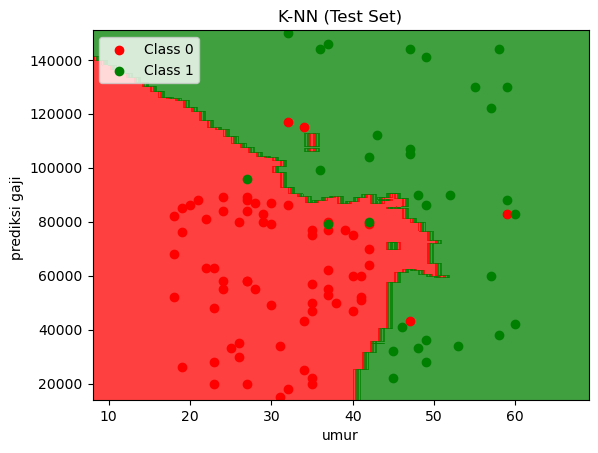

In [14]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test),y_test
# Membuat meshgrid untuk visualisasi
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, 
                               stop = X_set[:, 0].max() + 10, step = 1),
                    np.arange(start = X_set[:, 1].min() - 1000, 
                               stop = X_set[:, 1].max() + 1000, step = 1))

# Melakukan prediksi pada semua titik dalam meshgrid
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Memvisualisasikan titik data
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], 
            color = 'red', label = 'Class 0')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], 
            color = 'green', label = 'Class 1')

# Memberikan label pada sumbu
plt.xlabel('umur')
plt.ylabel('prediksi gaji ')
plt.title('K-NN (Test Set)')
plt.legend()
plt.show()
